<a href="https://colab.research.google.com/github/jaedyxn/ait23-project/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import RMSprop
from urllib.request import urlretrieve
import numpy as np
import random
import sys
import re, cgi
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cleaned.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Unnamed: 0,CONS_NO,FLAG,1/1/2014,1/10/2014,1/11/2014,1/12/2014,1/13/2014,1/14/2014,1/15/2014,...,9/28/2016,9/29/2016,9/3/2016,9/30/2016,9/4/2016,9/5/2016,9/6/2016,9/7/2016,9/8/2016,9/9/2016
0,0,0387DD8A07E07FDA6271170F86AD9151,1,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,13.876554,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,1,EDFC78B07BA2908B3395C4EB2304665E,1,2.900000,3.420000,3.810000,4.580000,3.560000,4.250000,3.860000,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
2,2,34C1954AA3703C4F8BD8EAEA7C4B7B83,1,0.110000,0.530000,0.450000,0.510000,1.320000,0.710000,0.120000,...,4.33,2.46,1.23,3.19,1.17,1.36,0.56,1.02,1.96,1.83
3,3,768309B0EB11FD436CEE5ABFB84F4C0C,1,0.910000,0.860000,1.100000,0.660000,5.820000,3.170000,1.180000,...,2.36,2.82,2.28,3.70,3.07,4.61,3.13,3.10,3.74,3.13
4,4,516954F5FF177CE314656D727FCC66A5,1,11.020000,8.240000,7.940000,7.920000,8.310000,7.390000,8.270000,...,51.36,52.39,113.35,60.89,115.62,108.69,87.88,86.36,81.51,81.75


In [ ]:
def data_split(df, flag, label):
    flags = np.array(df[flag])
    df = df.drop(flag, axis=1)
    df = df.drop(label, axis=1)
    df = np.array(df)
    return flags, df

In [ ]:
train, test = train_test_split(df, test_size=.2, random_state=42, stratify=df['FLAG'])

In [ ]:
training_flags, training_data = data_split(train, 'FLAG', 'CONS_NO')

In [ ]:
test_flags, test_data = data_split(test, 'FLAG', 'CONS_NO')

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape = (training_data.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(patience=5, restore_best_weights=True, monitor="val_accuracy")

model.fit(training_data, training_flags, 
          epochs=10, batch_size=32, 
          #validation_data=(X_valid, Y_valid), # validation
          callbacks=[es],
          verbose=1)

Epoch 1/10
779/780 [============================>.] - ETA: 0s - loss: 3.1607 - accuracy: 0.9498

780/780 [==============================] - 11s 11ms/step - loss: 3.1580 - accuracy: 0.9498
Epoch 2/10
778/780 [============================>.] - ETA: 0s - loss: 0.7058 - accuracy: 0.9579

780/780 [==============================] - 9s 12ms/step - loss: 0.7043 - accuracy: 0.9580
Epoch 3/10
780/780 [==============================] - ETA: 0s - loss: 0.2373 - accuracy: 0.9663

780/780 [==============================] - 7s 9ms/step - loss: 0.2373 - accuracy: 0.9663
Epoch 4/10
780/780 [==============================] - ETA: 0s - loss: 0.1748 - accuracy: 0.9731

780/780 [==============================] - 8s 11ms/step - loss: 0.1748 - accuracy: 0.9731
Epoch 5/10
780/780 [==============================] - ETA: 0s - loss: 0.1669 - accuracy: 0.9766

780/780 [==============================] - 5s 7ms/step - loss: 0.1669 - accuracy: 0.9766
Epoch 6/10
775/780 [============================>.] - ETA: 0s - loss: 0.2876 - accuracy: 0.9716

780/780 [==============================] - 7s 9ms/step - loss: 0.2860 - accuracy: 0.9717
Epoch 7/10
770/780 [============================>.] - ETA: 0s - loss: 0.0692 - accuracy: 0.9854

780/780 [==============================] - 4s 5ms/step - loss: 0.0686 - accuracy: 0.9855
Epoch 8/10
776/780 [============================>.] - ETA: 0s - loss: 0.0518 - accuracy: 0.9877

780/780 [==============================] - 4s 5ms/step - loss: 0.0524 - accuracy: 0.9875
Epoch 9/10
773/780 [============================>.] - ETA: 0s - loss: 0.0321 - accuracy: 0.9890

780/780 [==============================] - 7s 9ms/step - loss: 0.0320 - accuracy: 0.9891
Epoch 10/10
775/780 [============================>.] - ETA: 0s - loss: 0.0554 - accuracy: 0.9868

780/780 [==============================] - 5s 6ms/step - loss: 0.0552 - accuracy: 0.9869


In [ ]:
eval = model.evaluate(test_data, test_flags)
print("Test loss:",eval[0])
print("Test accuracy:",eval[1])

195/195 [==============================] - 1s 2ms/step - loss: 0.5875 - accuracy: 0.9934
Test loss: 0.5875241160392761
Test accuracy: 0.9934273958206177


195/195 [==============================] - 0s 2ms/step


<Axes: >

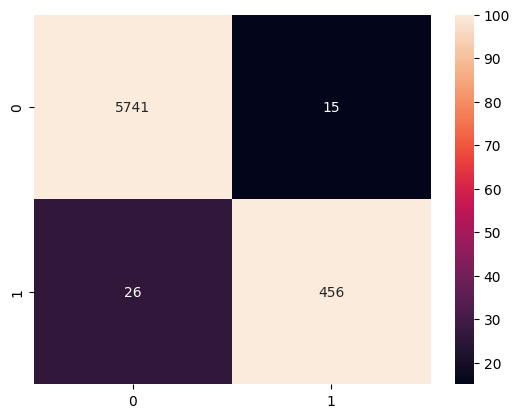

In [ ]:
preds = model.predict(test_data)
predsnp = np.array(preds)
predsround = np.where(predsnp >= 0.5, 1, 0)
conf=confusion_matrix(test_flags,predsround)
sns.heatmap(conf, annot=True, fmt='d', vmax=100)

In [ ]:
print("Accuracy: ",accuracy_score(test_flags, predsround))
print("Precision: ",precision_score(test_flags, predsround, average='macro'))
print("Recall: ", recall_score(test_flags, predsround, average='macro'))
print("F1: ",f1_score(test_flags, predsround, average='macro'))
ac1 = accuracy_score(test_flags, predsround)
pr1 = precision_score(test_flags, predsround, average='macro')
rc1 = recall_score(test_flags, predsround, average='macro')
f1 = f1_score(test_flags, predsround, average='macro')

Accuracy:  0.9934273805706957
Precision:  0.9818222281617682
Recall:  0.9717260574569131
F1:  0.9767099315671317


# Model Definition

In [ ]:
smote = SMOTE(sampling_strategy='minority')
training_data_smote, training_flags_smote = smote.fit_resample(training_data, training_flags)

In [ ]:
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape = (training_data_smote.shape[1],)))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Training

In [ ]:
es = EarlyStopping(patience=5, restore_best_weights=True, monitor="val_accuracy")

model2.fit(training_data_smote, training_flags_smote, 
          epochs=10, batch_size=32, 
          #validation_data=(X_valid, Y_valid), # validation
          callbacks=[es],
          verbose=1)

Epoch 1/10
1435/1439 [============================>.] - ETA: 0s - loss: 2.2323 - accuracy: 0.8905

1439/1439 [==============================] - 8s 4ms/step - loss: 2.2272 - accuracy: 0.8905
Epoch 2/10
1437/1439 [============================>.] - ETA: 0s - loss: 0.1983 - accuracy: 0.9629

1439/1439 [==============================] - 10s 7ms/step - loss: 0.1980 - accuracy: 0.9630
Epoch 3/10
1436/1439 [============================>.] - ETA: 0s - loss: 0.3804 - accuracy: 0.9615

1439/1439 [==============================] - 6s 4ms/step - loss: 0.3798 - accuracy: 0.9616
Epoch 4/10
1438/1439 [============================>.] - ETA: 0s - loss: 0.0843 - accuracy: 0.9830

1439/1439 [==============================] - 11s 7ms/step - loss: 0.0843 - accuracy: 0.9831
Epoch 5/10
1432/1439 [============================>.] - ETA: 0s - loss: 0.1847 - accuracy: 0.9760

1439/1439 [==============================] - 8s 5ms/step - loss: 0.1840 - accuracy: 0.9760
Epoch 6/10
1435/1439 [============================>.] - ETA: 0s - loss: 0.0305 - accuracy: 0.9923

1439/1439 [==============================] - 10s 7ms/step - loss: 0.0305 - accuracy: 0.9923
Epoch 7/10
1438/1439 [============================>.] - ETA: 0s - loss: 0.0636 - accuracy: 0.9882

1439/1439 [==============================] - 13s 9ms/step - loss: 0.0636 - accuracy: 0.9882
Epoch 8/10
1437/1439 [============================>.] - ETA: 0s - loss: 0.0268 - accuracy: 0.9921

1439/1439 [==============================] - 10s 7ms/step - loss: 0.0268 - accuracy: 0.9922
Epoch 9/10
1434/1439 [============================>.] - ETA: 0s - loss: 0.0302 - accuracy: 0.9919

1439/1439 [==============================] - 12s 8ms/step - loss: 0.0302 - accuracy: 0.9919
Epoch 10/10
1433/1439 [============================>.] - ETA: 0s - loss: 0.0245 - accuracy: 0.9927

1439/1439 [==============================] - 11s 8ms/step - loss: 0.0244 - accuracy: 0.9927


# Evaluation on test data

In [ ]:
eval = model2.evaluate(test_data, test_flags)
print("Test loss:",eval[0])
print("Test accuracy:",eval[1])

195/195 [==============================] - 1s 3ms/step - loss: 2.4902 - accuracy: 0.9836
Test loss: 2.4902474880218506
Test accuracy: 0.9836485981941223


# Confusion matrix

195/195 [==============================] - 1s 3ms/step
[[9.0895584e-38]
 [0.0000000e+00]
 [4.8251029e-14]
 ...
 [9.9575201e-12]
 [2.7830412e-30]
 [7.9434976e-06]]


<Axes: >

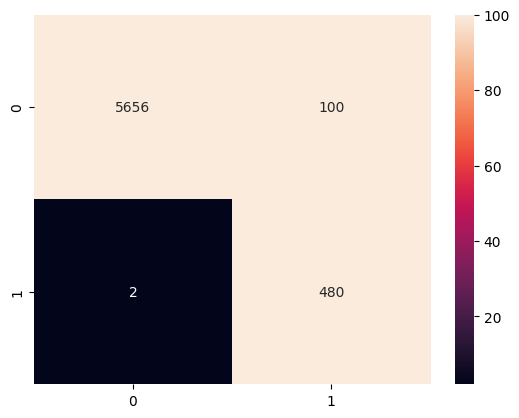

In [ ]:
preds = model2.predict(test_data)
print(preds)
predsnp = np.array(preds)
predsround = np.where(predsnp >= 0.5, 1, 0)
conf=confusion_matrix(test_flags,predsround)
sns.heatmap(conf, annot=True, fmt='d', vmax=100)

In [ ]:
print("Accuracy: ",accuracy_score(test_flags, predsround))
print("Precision: ",precision_score(test_flags, predsround, average='macro'))
print("Recall: ", recall_score(test_flags, predsround, average='macro'))
print("F1: ",f1_score(test_flags, predsround, average='macro'))
ac2 = accuracy_score(test_flags, predsround)
pr2 = precision_score(test_flags, predsround, average='macro')
rc2 = recall_score(test_flags, predsround, average='macro')
f2 = f1_score(test_flags, predsround, average='macro')

Accuracy:  0.9836486053222186
Precision:  0.9136163625504321
Recall:  0.9892387232950499
F1:  0.9475092041788309


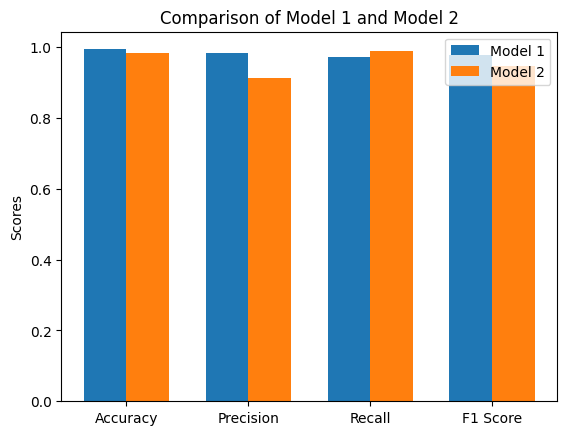

In [ ]:
import matplotlib.pyplot as plt
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Values for Model 1 and Model 2
model1_values = [ac1, pr1, rc1, f1]
model2_values = [ac2, pr2, rc2, f2]

# Set the position of the bars on the x-axis
x = np.arange(len(labels))

# Set the width of the bars
bar_width = 0.35

# Create the bar graph
fig, ax = plt.subplots()
rects1 = ax.bar(x - bar_width/2, model1_values, bar_width, label='Model 1')
rects2 = ax.bar(x + bar_width/2, model2_values, bar_width, label='Model 2')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model 1 and Model 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the bar graph
plt.show()